In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.optimize import minimize


plt.style.use('dark_background')
rng = np.random.default_rng(seed=42)
def histogram(data, ax, bins= None):
    ax.hist(data, bins=bins, edgecolor = 'black')  
    ax.set_title('Histogram')

def ogive(data, ax, bins=None):
    ax.hist(data, cumulative=True, bins=bins, color='orange', edgecolor='black') 
    ax.set_title('Ogive')
  

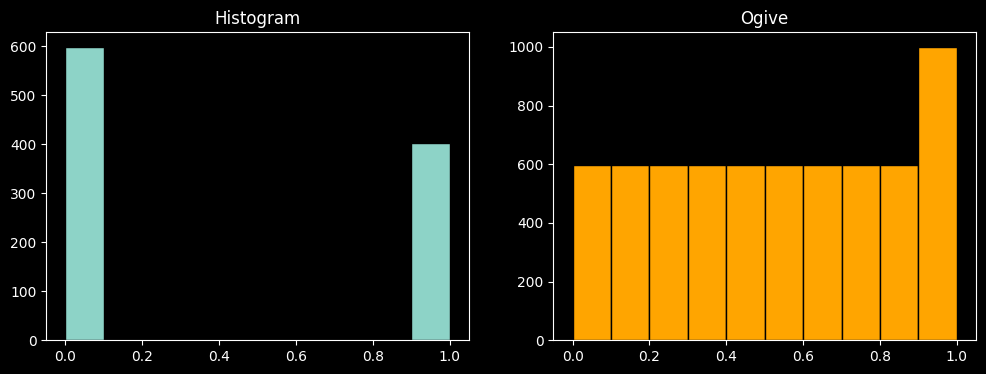

In [27]:
X = rng.choice([1,0], size=1000, p=[0.4, 0.6])
fig, ax = plt.subplots(1, 2, figsize=[12,4])
histogram(X, ax[0])
ogive(X, ax[1])

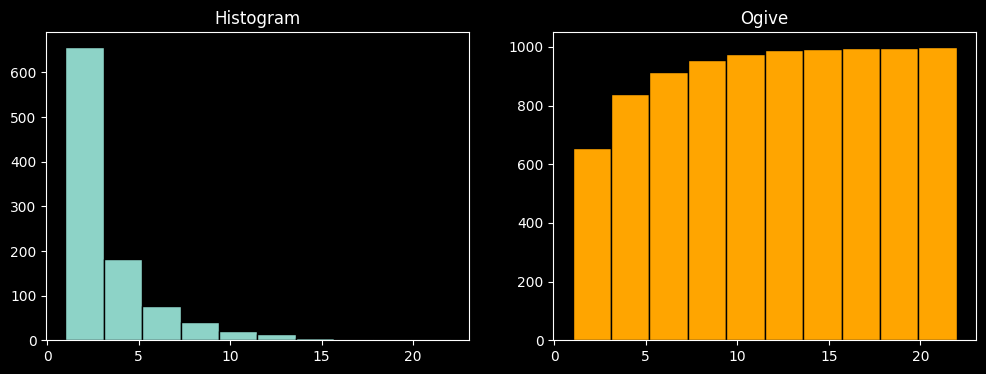

In [28]:
X = rng.geometric(size=1000, p=0.3)
fig, ax = plt.subplots(1, 2, figsize=[12,4])
histogram(X, ax[0])
ogive(X, ax[1])

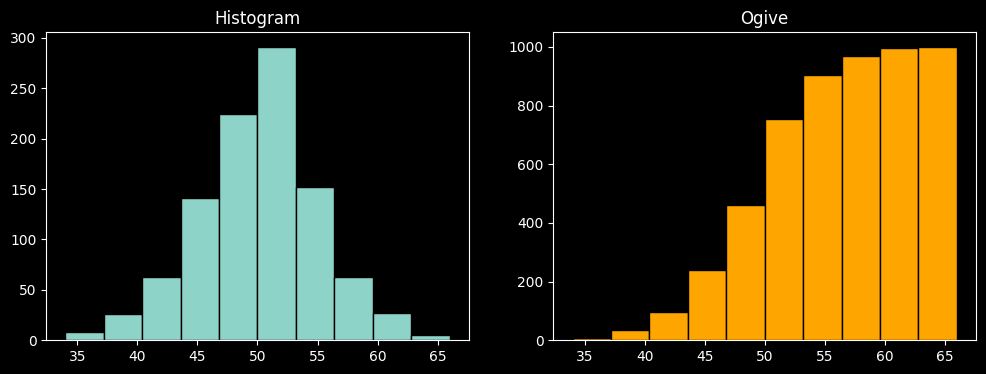

In [29]:
X = rng.binomial(n=100, p=0.5, size=1000)
fig, ax = plt.subplots(1, 2, figsize=[12,4])
histogram(X, ax[0])
ogive(X, ax[1])

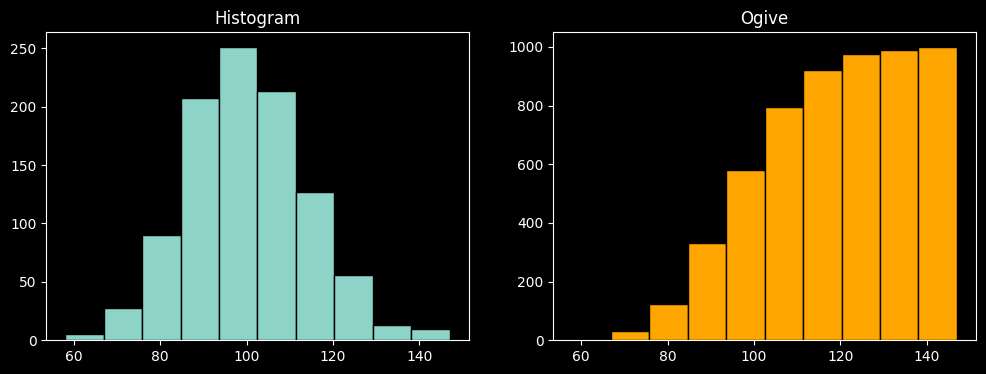

In [30]:
X = rng.negative_binomial(n=100, p=0.5, size=1000)
fig, ax = plt.subplots(1, 2, figsize=[12,4])
histogram(X, ax[0])
ogive(X, ax[1])

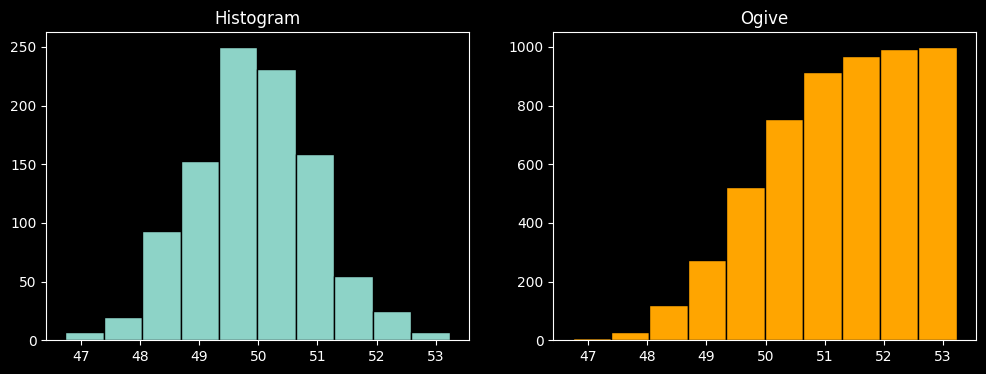

In [31]:
X = rng.normal(size=1000, loc=50)
fig, ax = plt.subplots(1, 2, figsize=[12,4])
histogram(X, ax[0])
ogive(X, ax[1])

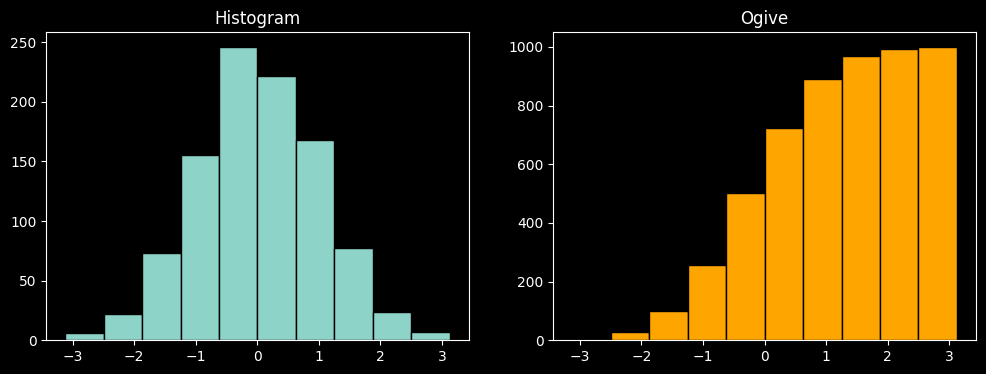

In [32]:
X = rng.standard_normal(size=1000)
fig, ax = plt.subplots(1, 2, figsize=[12,4])
histogram(X, ax[0])
ogive(X, ax[1])

# Exercises

In [33]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Sebastian!\Documents\Programmering\Statistiska-metoder\Data\Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Exercise 1a)

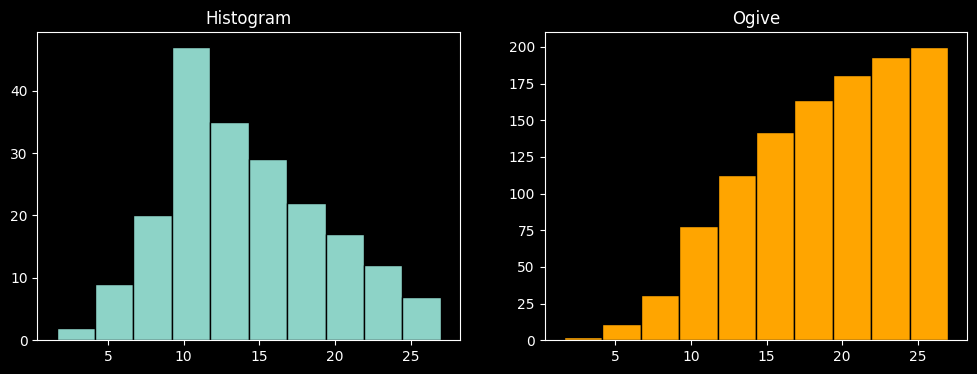

In [34]:
fig, ax = plt.subplots(1, 2, figsize=[12,4])
histogram(df['Sales'], ax[0])
ogive(df['Sales'], ax[1])

Spontant tycker jag den mest liknar en negativ binomial med tanke på svansen, samt en peak innan medianen. Att testa detta verkar vara relativt avancerat, eftersom nbinom från scipy inte har någon .fit()-funktion, kan skapa en egen men för uppgiftens syfte avvaktar jag. Men om man vill testa så verkar ett goodness of fit-test som exempelvis Chi-Square vara relevant.



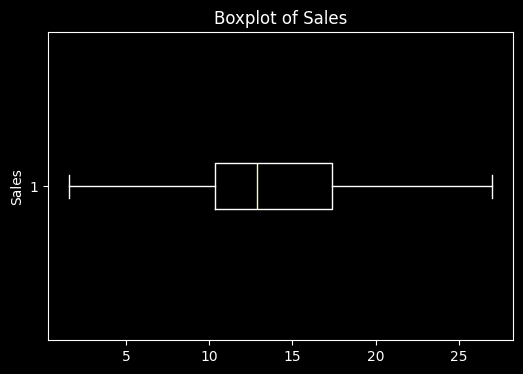

In [35]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Sales'], vert=False)
plt.title("Boxplot of Sales")
plt.ylabel("Sales")
plt.show()


Föredrar histogram hittills.

## Exercise 2

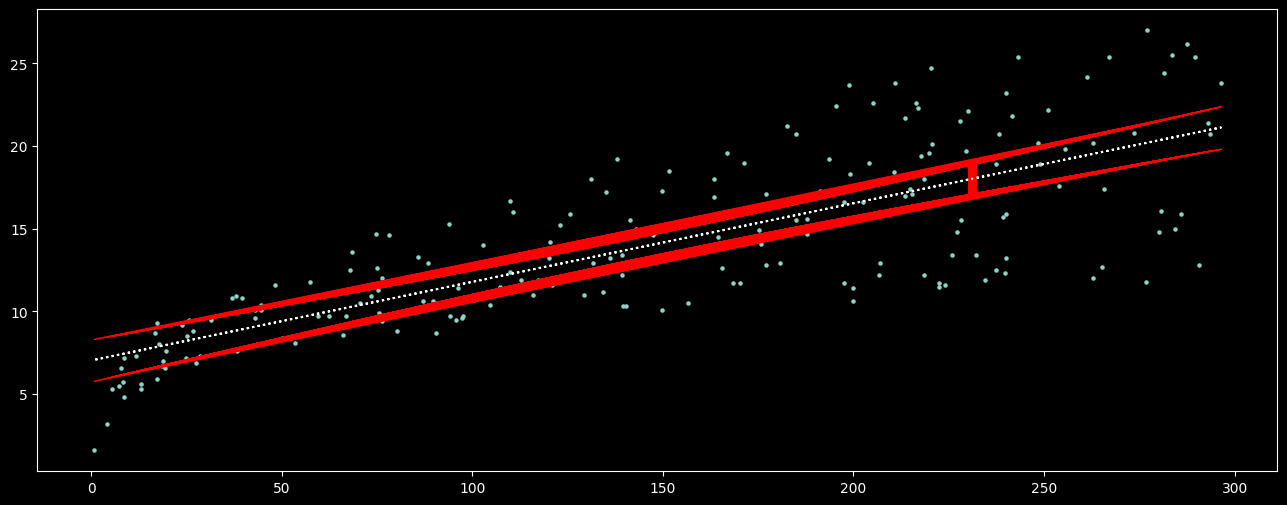

In [44]:
x = df['TV'].values
y = df['Sales'].values

a, b = np.polyfit(x, y, 1)
y_pred = a*x + b
residuals = y - y_pred
n = len(x)
alpha = 0.003
s_err = np.sqrt(np.sum(residuals**2) / (n-2))
x_mean = np.mean(x)
se_line = s_err * np.sqrt(1/n + (x - x_mean)**2 / np.sum((x - x_mean)**2))
t = st.t.ppf(1-alpha, df=n-2)

lower = y_pred - t * se_line
upper = y_pred + t * se_line


plt.figure(figsize=(16,6))
plt.scatter(df['TV'], df['Sales'], s=5)
plt.plot(x, a*x+b, color = 'white', linestyle = ':')
plt.fill_between(x, lower, upper, color = 'red')

In [37]:
display(df.cov())
display(df.corr()) #pearson-r

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Datan visar på en korrelation på 0.78 och en kovarians på 350 mellan TV och Sales, vilket tyder på ett starkt samband där Sales ökar när reklam ökar.

## c)

om pearson är större än 0.5 kan vi åtminstone motivera att det finns något linjärt beroende, och i detta fall har vi ett pearson-r på 0.78 vilket tyder på ett relativt starkt beroende.

## Exercise 4

In [38]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Räknar nedan ut mean  och st dev av Sales-kolumnen manuellt, för att påvisa att df['Sales'].describe() faktiskt räknar ut dessa korrekt.

Mean: $\bar{x} = \frac{\sum x_i}{n}$

Varians: $\sigma^2 = \frac{\sum (x_i - \bar{x})}{n-1}$

Standardavvikelse = $ \sigma = \sqrt s^2 $

Count visar antalet värden i kolumnen. Min & max värden visar helt enkelt den minsta och den största siffran i kolumnen, och där emellan visas percentilerna, 25 50 och 75. Dessa kan i viss mån ge ledtrådar till var de flesta värdena ligger.

In [39]:
total = sum(df['Sales'])
mean = total / df['Sales'].count()
deviations = [abs(row-mean)**2 for row in df['Sales']]
s2 = sum(deviations) / (df['Sales'].count() -1) #variance
s = np.sqrt(s2)

print(f"Mean: {mean}")
print(f"Standard deviation : {s}")

Mean: 14.0225
Standard deviation : 5.217456565710477


Här ser vi även att eftersom sigma^2(variansen) i mitt exempel räknas med bessels korrigering och standardavvikelsen blir densamma som när vi räknar med pandas, så har vi påvisat att pandas använder sig av Bessels korrigering. Utan korrigeringen blir sigma = ungefär 20, vilket inte stämmer överens med pandas resultat.

## Exercise 5

In [40]:
mean = df.mean()
median = df.median()
mode = df.mode()

print(mean)
print(median)
print(mode)

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64
TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64
      TV  Radio  Newspaper  Sales
0   17.2    4.1        8.7    9.7
1   76.4    5.7        9.3    NaN
2  109.8    NaN       25.6    NaN
3  177.0    NaN        NaN    NaN
4  184.9    NaN        NaN    NaN
5  197.6    NaN        NaN    NaN
6  199.8    NaN        NaN    NaN
7  222.4    NaN        NaN    NaN
8  237.4    NaN        NaN    NaN
9  240.1    NaN        NaN    NaN
